In [1]:
import torch
import numpy as np
import tensorly as tl
import scipy.signal
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r'/media/rich/Home_Linux_partition/github_repos')
%load_ext autoreload
%autoreload 2
from tensor_regression import multinomial_tensor_regression as mtr

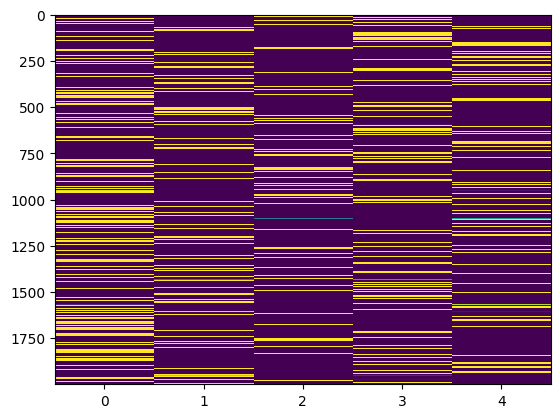

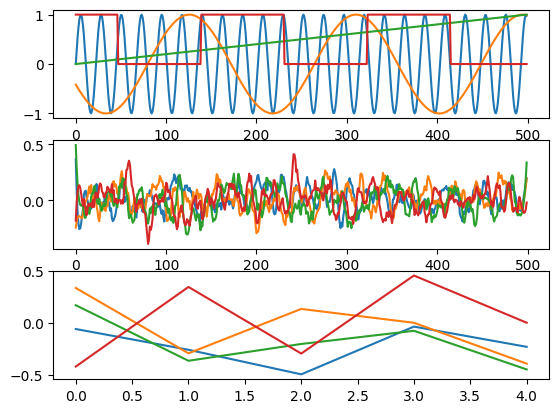

In [3]:
torch.manual_seed(321)
np.random.seed(321)

X_dims_fake = [2000, 500, 500]
nClasses_fake = 5

# y_true  = np.random.randint(0, nClasses_fake, X_dims_fake[0])
# y_true_oneHot = mtr.idx_to_oneHot(y_true, nClasses_fake)

Xcp_underlying_fake = [
                      torch.rand(X_dims_fake[0], 4)-0.5,
                      torch.vstack([torch.sin(torch.linspace(0, 140, X_dims_fake[1])),
                                    torch.cos(torch.linspace(2,19,X_dims_fake[1])),
                                    torch.linspace(0,1,X_dims_fake[1]),
                                    torch.cos(torch.linspace(0,17,X_dims_fake[1])) >0]).T ,
                      torch.tensor(scipy.signal.savgol_filter(np.random.rand(X_dims_fake[2], 4), 15, 3, axis=0))-0.5,
                    ]
Bcp_underlying_fake = Xcp_underlying_fake[1:] + [torch.rand(nClasses_fake, 4) -0.5]

tl.set_backend('pytorch')
X_fake = tl.cp_tensor.cp_to_tensor((np.ones(4), Xcp_underlying_fake))

y_trueProb_fake = mtr.model(X_fake, Bcp_underlying_fake, np.ones(4), [False, False, False])
y_trueIdx_fake = torch.argmax(y_trueProb_fake, dim=1)

plt.figure()
plt.imshow(y_trueProb_fake, aspect='auto', interpolation='none')

fig, axs = plt.subplots(len(Bcp_underlying_fake))
for ii in range(len(axs)):
    axs[ii].plot(Bcp_underlying_fake[ii]);

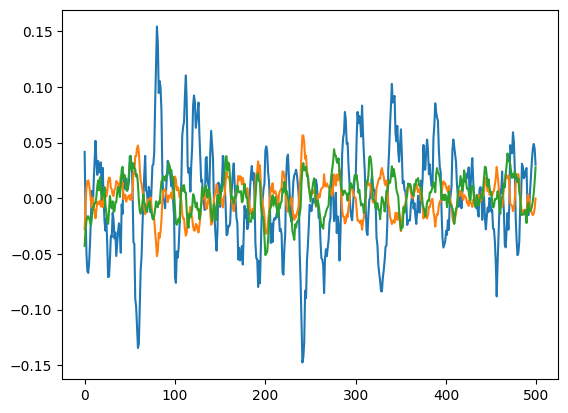

In [4]:
plt.figure()
plt.plot(X_fake[:3][:,0].T);

In [15]:
X = X_fake.numpy()
X = (X - np.mean(X, axis=1)[:,None,:])
y = y_trueIdx_fake.numpy()
# DEVICE = mtr.set_device(use_GPU=True)
DEVICE = 'cuda:0'

# h_vals = np.logspace(-50, 2, num=30, endpoint=True, base=10.0)
# h_vals = np.int64(np.linspace(1, 300, num=30, endpoint=True))
h_vals = np.arange(1)

loss_all = []
for ii, val in enumerate(h_vals):
    print(f'hyperparameter val: {val}')
    cpmlr = mtr.CP_logistic_regression(
        X,
        y, 
        rank=4,
        non_negative=[False, False, False],
        weights=None,
        Bcp_init=None,
        Bcp_init_scale=1,
        device=DEVICE,
        softplus_kwargs={
            'beta': 50,
            'threshold':1
        }
    )

#     # tic = time.time()
#     cpmlr.fit(lambda_L2=0.003, 
#                 max_iter=200, 
#                 tol=1e-50, 
#                 patience=10,
#                 verbose=2,
#                 running_loss_logging_interval=1,
#                 LBFGS_kwargs={
#                     'lr' : 10000, 
#                     'max_iter' : 20, 
#                     'max_eval' : None, 
#                     'tolerance_grad' : 1e-07, 
#                     'tolerance_change' : 1e-09, 
#                     'history_size' : 100, 
#                     'line_search_fn' : "strong_wolfe"
#                 }
#              )
    
    cpmlr.fit_Adam(lambda_L2=0.01, 
                max_iter=4000, 
                tol=1e-6, 
                patience=100,
                verbose=2,
                Adam_kwargs={
                        'lr' : 0.01, 
#                             'betas' : (0.9, 0.999), 
#                             'eps' : 1e-08, 
#                             'weight_decay' : 0, 
                        'amsgrad' : True
                    }
         )

    # print(time.time() - tic)
    print(f'loss: {cpmlr.loss_running[-1]}')
    
    loss_all.append(cpmlr.loss_running[-1])

hyperparameter val: 0
Iteration: 0, Loss: 1.9082950353622437
Iteration: 1, Loss: 1.832067608833313
Iteration: 2, Loss: 1.7926905155181885
Iteration: 3, Loss: 1.7567112445831299
Iteration: 4, Loss: 1.7119121551513672
Iteration: 5, Loss: 1.672973871231079
Iteration: 6, Loss: 1.6527372598648071
Iteration: 7, Loss: 1.6414388418197632
Iteration: 8, Loss: 1.6291089057922363
Iteration: 9, Loss: 1.6120835542678833
Iteration: 10, Loss: 1.5884270668029785
Iteration: 11, Loss: 1.5630414485931396
Iteration: 12, Loss: 1.5398902893066406
Iteration: 13, Loss: 1.5151309967041016
Iteration: 14, Loss: 1.4906147718429565
Iteration: 15, Loss: 1.4699933528900146
Iteration: 16, Loss: 1.4576685428619385
Iteration: 17, Loss: 1.4464178085327148
Iteration: 18, Loss: 1.4321246147155762
Iteration: 19, Loss: 1.4231923818588257
Iteration: 20, Loss: 1.4277364015579224
Iteration: 21, Loss: 1.4292278289794922
Iteration: 22, Loss: 1.4157600402832031
Iteration: 23, Loss: 1.3969225883483887
Iteration: 24, Loss: 1.3894619

Iteration: 227, Loss: 1.0307385921478271
Iteration: 228, Loss: 1.030593991279602
Iteration: 229, Loss: 1.0304534435272217
Iteration: 230, Loss: 1.030316948890686
Iteration: 231, Loss: 1.030184030532837
Iteration: 232, Loss: 1.0300548076629639
Iteration: 233, Loss: 1.029929280281067
Iteration: 234, Loss: 1.0298073291778564
Iteration: 235, Loss: 1.0296885967254639
Iteration: 236, Loss: 1.0295730829238892
Iteration: 237, Loss: 1.0294606685638428
Iteration: 238, Loss: 1.0293514728546143
Iteration: 239, Loss: 1.029245138168335
Iteration: 240, Loss: 1.0291414260864258
Iteration: 241, Loss: 1.0290404558181763
Iteration: 242, Loss: 1.0289424657821655
Iteration: 243, Loss: 1.0288466215133667
Iteration: 244, Loss: 1.0287535190582275
Iteration: 245, Loss: 1.0286625623703003
Iteration: 246, Loss: 1.028573989868164
Iteration: 247, Loss: 1.0284875631332397
Iteration: 248, Loss: 1.0284031629562378
Iteration: 249, Loss: 1.0283211469650269
Iteration: 250, Loss: 1.0282410383224487
Iteration: 251, Loss: 

Iteration: 453, Loss: 1.023185133934021
Iteration: 454, Loss: 1.023262619972229
Iteration: 455, Loss: 1.0232069492340088
Iteration: 456, Loss: 1.0231050252914429
Iteration: 457, Loss: 1.022912859916687
Iteration: 458, Loss: 1.0227426290512085
Iteration: 459, Loss: 1.0225884914398193
Iteration: 460, Loss: 1.0224809646606445
Iteration: 461, Loss: 1.022407054901123
Iteration: 462, Loss: 1.022360920906067
Iteration: 463, Loss: 1.022333025932312
Iteration: 464, Loss: 1.0223180055618286
Iteration: 465, Loss: 1.0223129987716675
Iteration: 466, Loss: 1.0223181247711182
Iteration: 467, Loss: 1.0223371982574463
Iteration: 468, Loss: 1.0223733186721802
Iteration: 469, Loss: 1.022440791130066
Iteration: 470, Loss: 1.0225359201431274
Iteration: 471, Loss: 1.0226836204528809
Iteration: 472, Loss: 1.0228233337402344
Iteration: 473, Loss: 1.0229741334915161
Iteration: 474, Loss: 1.0229690074920654
Iteration: 475, Loss: 1.022890567779541
Iteration: 476, Loss: 1.022661566734314
Iteration: 477, Loss: 1.0

Iteration: 675, Loss: 1.0202265977859497
Iteration: 676, Loss: 1.0202646255493164
Iteration: 677, Loss: 1.0203217267990112
Iteration: 678, Loss: 1.020415186882019
Iteration: 679, Loss: 1.020534634590149
Iteration: 680, Loss: 1.0207163095474243
Iteration: 681, Loss: 1.020882248878479
Iteration: 682, Loss: 1.0210797786712646
Iteration: 683, Loss: 1.0210984945297241
Iteration: 684, Loss: 1.0210638046264648
Iteration: 685, Loss: 1.0208394527435303
Iteration: 686, Loss: 1.0206382274627686
Iteration: 687, Loss: 1.0204299688339233
Iteration: 688, Loss: 1.0202929973602295
Iteration: 689, Loss: 1.020198941230774
Iteration: 690, Loss: 1.0201460123062134
Iteration: 691, Loss: 1.0201177597045898
Iteration: 692, Loss: 1.0201051235198975
Iteration: 693, Loss: 1.0201020240783691
Iteration: 694, Loss: 1.0201061964035034
Iteration: 695, Loss: 1.0201178789138794
Iteration: 696, Loss: 1.0201388597488403
Iteration: 697, Loss: 1.020175576210022
Iteration: 698, Loss: 1.0202314853668213
Iteration: 699, Loss:

Iteration: 896, Loss: 1.0196675062179565
Iteration: 897, Loss: 1.0196727514266968
Iteration: 898, Loss: 1.0196847915649414
Iteration: 899, Loss: 1.0197075605392456
Iteration: 900, Loss: 1.0197484493255615
Iteration: 901, Loss: 1.019811987876892
Iteration: 902, Loss: 1.0199203491210938
Iteration: 903, Loss: 1.0200663805007935
Iteration: 904, Loss: 1.0202994346618652
Iteration: 905, Loss: 1.0205239057540894
Iteration: 906, Loss: 1.0208020210266113
Iteration: 907, Loss: 1.0208368301391602
Iteration: 908, Loss: 1.020796775817871
Iteration: 909, Loss: 1.0204956531524658
Iteration: 910, Loss: 1.0202395915985107
Iteration: 911, Loss: 1.0199850797653198
Iteration: 912, Loss: 1.019829273223877
Iteration: 913, Loss: 1.0197292566299438
Iteration: 914, Loss: 1.0196763277053833
Iteration: 915, Loss: 1.0196504592895508
Iteration: 916, Loss: 1.019642949104309
Iteration: 917, Loss: 1.0196473598480225
Iteration: 918, Loss: 1.019660472869873
Iteration: 919, Loss: 1.019683599472046
Iteration: 920, Loss: 

Iteration: 1114, Loss: 1.0203295946121216
Iteration: 1115, Loss: 1.0202717781066895
Iteration: 1116, Loss: 1.0201009511947632
Iteration: 1117, Loss: 1.0199699401855469
Iteration: 1118, Loss: 1.0198270082473755
Iteration: 1119, Loss: 1.0197347402572632
Iteration: 1120, Loss: 1.0196621417999268
Iteration: 1121, Loss: 1.0196201801300049
Iteration: 1122, Loss: 1.0195926427841187
Iteration: 1123, Loss: 1.019580602645874
Iteration: 1124, Loss: 1.019576072692871
Iteration: 1125, Loss: 1.0195807218551636
Iteration: 1126, Loss: 1.0195918083190918
Iteration: 1127, Loss: 1.0196157693862915
Iteration: 1128, Loss: 1.019649863243103
Iteration: 1129, Loss: 1.0197068452835083
Iteration: 1130, Loss: 1.0197768211364746
Iteration: 1131, Loss: 1.0198843479156494
Iteration: 1132, Loss: 1.0199899673461914
Iteration: 1133, Loss: 1.020137906074524
Iteration: 1134, Loss: 1.0202224254608154
Iteration: 1135, Loss: 1.0203198194503784
Iteration: 1136, Loss: 1.0202748775482178
Iteration: 1137, Loss: 1.0202273130416

Iteration: 1326, Loss: 1.0197263956069946
Iteration: 1327, Loss: 1.0196977853775024
Iteration: 1328, Loss: 1.0196683406829834
Iteration: 1329, Loss: 1.0196588039398193
Iteration: 1330, Loss: 1.0196504592895508
Iteration: 1331, Loss: 1.0196598768234253
Iteration: 1332, Loss: 1.019670009613037
Iteration: 1333, Loss: 1.0196990966796875
Iteration: 1334, Loss: 1.0197263956069946
Iteration: 1335, Loss: 1.019775629043579
Iteration: 1336, Loss: 1.0198132991790771
Iteration: 1337, Loss: 1.019873857498169
Iteration: 1338, Loss: 1.0199029445648193
Iteration: 1339, Loss: 1.0199495553970337
Iteration: 1340, Loss: 1.0199434757232666
Iteration: 1341, Loss: 1.0199506282806396
Iteration: 1342, Loss: 1.019904375076294
Iteration: 1343, Loss: 1.0198757648468018
Iteration: 1344, Loss: 1.0198148488998413
Iteration: 1345, Loss: 1.0197771787643433
Iteration: 1346, Loss: 1.0197280645370483
Iteration: 1347, Loss: 1.0197014808654785
Iteration: 1348, Loss: 1.0196733474731445
Iteration: 1349, Loss: 1.0196646451950

Iteration: 1547, Loss: 1.0197242498397827
Iteration: 1548, Loss: 1.0197120904922485
Iteration: 1549, Loss: 1.0197181701660156
Iteration: 1550, Loss: 1.0197144746780396
Iteration: 1551, Loss: 1.0197287797927856
Iteration: 1552, Loss: 1.0197315216064453
Iteration: 1553, Loss: 1.0197527408599854
Iteration: 1554, Loss: 1.0197582244873047
Iteration: 1555, Loss: 1.0197821855545044
Iteration: 1556, Loss: 1.0197850465774536
Iteration: 1557, Loss: 1.019805669784546
Iteration: 1558, Loss: 1.0198001861572266
Iteration: 1559, Loss: 1.019811987876892
Iteration: 1560, Loss: 1.01979660987854
Iteration: 1561, Loss: 1.0197988748550415
Iteration: 1562, Loss: 1.0197765827178955
Iteration: 1563, Loss: 1.0197725296020508
Iteration: 1564, Loss: 1.0197495222091675
Iteration: 1565, Loss: 1.0197454690933228
Iteration: 1566, Loss: 1.0197267532348633
Iteration: 1567, Loss: 1.0197272300720215
Iteration: 1568, Loss: 1.019715666770935
Iteration: 1569, Loss: 1.0197227001190186
Iteration: 1570, Loss: 1.01971888542175

Iteration: 1770, Loss: 1.0197374820709229
Iteration: 1771, Loss: 1.0197478532791138
Iteration: 1772, Loss: 1.0197410583496094
Iteration: 1773, Loss: 1.019752025604248
Iteration: 1774, Loss: 1.0197453498840332
Iteration: 1775, Loss: 1.019756555557251
Iteration: 1776, Loss: 1.0197488069534302
Iteration: 1777, Loss: 1.019758939743042
Iteration: 1778, Loss: 1.0197499990463257
Iteration: 1779, Loss: 1.019758701324463
Iteration: 1780, Loss: 1.019748330116272
Iteration: 1781, Loss: 1.0197558403015137
Iteration: 1782, Loss: 1.0197447538375854
Iteration: 1783, Loss: 1.0197515487670898
Iteration: 1784, Loss: 1.0197407007217407
Iteration: 1785, Loss: 1.0197476148605347
Iteration: 1786, Loss: 1.0197376012802124
Iteration: 1787, Loss: 1.0197453498840332
Iteration: 1788, Loss: 1.019736409187317
Iteration: 1789, Loss: 1.0197453498840332
Iteration: 1790, Loss: 1.0197378396987915
Iteration: 1791, Loss: 1.0197478532791138
Iteration: 1792, Loss: 1.0197407007217407
Iteration: 1793, Loss: 1.019751310348510

Iteration: 1987, Loss: 1.019745111465454
Iteration: 1988, Loss: 1.0197361707687378
Iteration: 1989, Loss: 1.019745111465454
Iteration: 1990, Loss: 1.0197361707687378
Iteration: 1991, Loss: 1.0197452306747437
Iteration: 1992, Loss: 1.0197365283966064
Iteration: 1993, Loss: 1.0197454690933228
Iteration: 1994, Loss: 1.019736647605896
Iteration: 1995, Loss: 1.0197457075119019
Iteration: 1996, Loss: 1.0197370052337646
Iteration: 1997, Loss: 1.0197458267211914
Iteration: 1998, Loss: 1.0197371244430542
Iteration: 1999, Loss: 1.019745945930481
Iteration: 2000, Loss: 1.0197370052337646
Iteration: 2001, Loss: 1.0197455883026123
Iteration: 2002, Loss: 1.0197367668151855
Iteration: 2003, Loss: 1.0197452306747437
Iteration: 2004, Loss: 1.0197362899780273
Iteration: 2005, Loss: 1.0197449922561646
Iteration: 2006, Loss: 1.0197360515594482
Iteration: 2007, Loss: 1.0197449922561646
Iteration: 2008, Loss: 1.0197359323501587
Iteration: 2009, Loss: 1.019744634628296
Iteration: 2010, Loss: 1.01973593235015

Iteration: 2207, Loss: 1.0197421312332153
Iteration: 2208, Loss: 1.0197330713272095
Iteration: 2209, Loss: 1.0197421312332153
Iteration: 2210, Loss: 1.0197330713272095
Iteration: 2211, Loss: 1.0197418928146362
Iteration: 2212, Loss: 1.019733190536499
Iteration: 2213, Loss: 1.0197420120239258
Iteration: 2214, Loss: 1.019733190536499
Iteration: 2215, Loss: 1.0197418928146362
Iteration: 2216, Loss: 1.0197330713272095
Iteration: 2217, Loss: 1.0197417736053467
Iteration: 2218, Loss: 1.01973295211792
Iteration: 2219, Loss: 1.0197417736053467
Iteration: 2220, Loss: 1.0197330713272095
Iteration: 2221, Loss: 1.0197416543960571
Iteration: 2222, Loss: 1.0197330713272095
Iteration: 2223, Loss: 1.0197416543960571
Iteration: 2224, Loss: 1.01973295211792
Iteration: 2225, Loss: 1.0197417736053467
Iteration: 2226, Loss: 1.01973295211792
Iteration: 2227, Loss: 1.0197417736053467
Iteration: 2228, Loss: 1.0197330713272095
Iteration: 2229, Loss: 1.0197417736053467
Iteration: 2230, Loss: 1.0197328329086304


Iteration: 2428, Loss: 1.0197311639785767
Iteration: 2429, Loss: 1.0197398662567139
Iteration: 2430, Loss: 1.0197311639785767
Iteration: 2431, Loss: 1.0197398662567139
Iteration: 2432, Loss: 1.0197311639785767
Iteration: 2433, Loss: 1.0197397470474243
Iteration: 2434, Loss: 1.0197312831878662
Iteration: 2435, Loss: 1.0197398662567139
Iteration: 2436, Loss: 1.0197312831878662
Iteration: 2437, Loss: 1.0197398662567139
Iteration: 2438, Loss: 1.0197312831878662
Iteration: 2439, Loss: 1.0197398662567139
Iteration: 2440, Loss: 1.0197312831878662
Iteration: 2441, Loss: 1.0197397470474243
Iteration: 2442, Loss: 1.0197311639785767
Iteration: 2443, Loss: 1.0197397470474243
Iteration: 2444, Loss: 1.0197311639785767
Iteration: 2445, Loss: 1.0197397470474243
Iteration: 2446, Loss: 1.0197311639785767
Iteration: 2447, Loss: 1.0197397470474243
Iteration: 2448, Loss: 1.0197311639785767
Iteration: 2449, Loss: 1.0197396278381348
Iteration: 2450, Loss: 1.0197311639785767
Iteration: 2451, Loss: 1.019739627

Iteration: 2645, Loss: 1.019738793373108
Iteration: 2646, Loss: 1.0197299718856812
Iteration: 2647, Loss: 1.0197386741638184
Iteration: 2648, Loss: 1.0197300910949707
Iteration: 2649, Loss: 1.0197386741638184
Iteration: 2650, Loss: 1.0197300910949707
Iteration: 2651, Loss: 1.0197386741638184
Iteration: 2652, Loss: 1.0197300910949707
Iteration: 2653, Loss: 1.0197385549545288
Iteration: 2654, Loss: 1.0197300910949707
Iteration: 2655, Loss: 1.0197384357452393
Iteration: 2656, Loss: 1.0197299718856812
Iteration: 2657, Loss: 1.0197384357452393
Iteration: 2658, Loss: 1.0197299718856812
Iteration: 2659, Loss: 1.0197384357452393
Iteration: 2660, Loss: 1.0197299718856812
Iteration: 2661, Loss: 1.0197385549545288
Iteration: 2662, Loss: 1.0197299718856812
Iteration: 2663, Loss: 1.0197384357452393
Iteration: 2664, Loss: 1.0197299718856812
Iteration: 2665, Loss: 1.0197384357452393
Iteration: 2666, Loss: 1.0197299718856812
Iteration: 2667, Loss: 1.0197385549545288
Iteration: 2668, Loss: 1.0197300910

Iteration: 2865, Loss: 1.0197378396987915
Iteration: 2866, Loss: 1.0197293758392334
Iteration: 2867, Loss: 1.0197378396987915
Iteration: 2868, Loss: 1.0197293758392334
Iteration: 2869, Loss: 1.019737958908081
Iteration: 2870, Loss: 1.0197293758392334
Iteration: 2871, Loss: 1.0197378396987915
Iteration: 2872, Loss: 1.0197293758392334
Iteration: 2873, Loss: 1.0197378396987915
Iteration: 2874, Loss: 1.019729495048523
Iteration: 2875, Loss: 1.019737958908081
Iteration: 2876, Loss: 1.019729495048523
Iteration: 2877, Loss: 1.019737958908081
Iteration: 2878, Loss: 1.019729495048523
Iteration: 2879, Loss: 1.0197380781173706
Iteration: 2880, Loss: 1.0197293758392334
Iteration: 2881, Loss: 1.0197380781173706
Iteration: 2882, Loss: 1.0197293758392334
Iteration: 2883, Loss: 1.019737958908081
Iteration: 2884, Loss: 1.0197293758392334
Iteration: 2885, Loss: 1.019737958908081
Iteration: 2886, Loss: 1.0197293758392334
Iteration: 2887, Loss: 1.019737958908081
Iteration: 2888, Loss: 1.0197293758392334
I

Iteration: 3084, Loss: 1.0197290182113647
Iteration: 3085, Loss: 1.0197376012802124
Iteration: 3086, Loss: 1.0197291374206543
Iteration: 3087, Loss: 1.0197376012802124
Iteration: 3088, Loss: 1.0197291374206543
Iteration: 3089, Loss: 1.0197376012802124
Iteration: 3090, Loss: 1.0197291374206543
Iteration: 3091, Loss: 1.0197376012802124
Iteration: 3092, Loss: 1.0197291374206543
Iteration: 3093, Loss: 1.0197374820709229
Iteration: 3094, Loss: 1.0197291374206543
Iteration: 3095, Loss: 1.0197376012802124
Iteration: 3096, Loss: 1.0197290182113647
Iteration: 3097, Loss: 1.0197374820709229
Iteration: 3098, Loss: 1.0197290182113647
Iteration: 3099, Loss: 1.0197376012802124
Iteration: 3100, Loss: 1.0197290182113647
Iteration: 3101, Loss: 1.0197376012802124
Iteration: 3102, Loss: 1.0197288990020752
Iteration: 3103, Loss: 1.0197376012802124
Iteration: 3104, Loss: 1.0197288990020752
Iteration: 3105, Loss: 1.0197376012802124
Iteration: 3106, Loss: 1.0197290182113647
Iteration: 3107, Loss: 1.019737601

Iteration: 3301, Loss: 1.0197373628616333
Iteration: 3302, Loss: 1.0197288990020752
Iteration: 3303, Loss: 1.0197373628616333
Iteration: 3304, Loss: 1.0197287797927856
Iteration: 3305, Loss: 1.0197373628616333
Iteration: 3306, Loss: 1.019728660583496
Iteration: 3307, Loss: 1.0197372436523438
Iteration: 3308, Loss: 1.019728660583496
Iteration: 3309, Loss: 1.0197372436523438
Iteration: 3310, Loss: 1.019728660583496
Iteration: 3311, Loss: 1.0197372436523438
Iteration: 3312, Loss: 1.0197287797927856
Iteration: 3313, Loss: 1.0197374820709229
Iteration: 3314, Loss: 1.0197287797927856
Iteration: 3315, Loss: 1.0197374820709229
Iteration: 3316, Loss: 1.0197288990020752
Iteration: 3317, Loss: 1.0197374820709229
Iteration: 3318, Loss: 1.0197288990020752
Iteration: 3319, Loss: 1.0197374820709229
Iteration: 3320, Loss: 1.0197288990020752
Iteration: 3321, Loss: 1.0197374820709229
Iteration: 3322, Loss: 1.0197287797927856
Iteration: 3323, Loss: 1.0197373628616333
Iteration: 3324, Loss: 1.019728660583

Iteration: 3521, Loss: 1.0197373628616333
Iteration: 3522, Loss: 1.0197285413742065
Iteration: 3523, Loss: 1.0197373628616333
Iteration: 3524, Loss: 1.0197285413742065
Iteration: 3525, Loss: 1.0197373628616333
Iteration: 3526, Loss: 1.0197285413742065
Iteration: 3527, Loss: 1.0197372436523438
Iteration: 3528, Loss: 1.0197285413742065
Iteration: 3529, Loss: 1.0197373628616333
Iteration: 3530, Loss: 1.0197285413742065
Iteration: 3531, Loss: 1.0197372436523438
Iteration: 3532, Loss: 1.019728660583496
Iteration: 3533, Loss: 1.0197373628616333
Iteration: 3534, Loss: 1.019728660583496
Iteration: 3535, Loss: 1.0197373628616333
Iteration: 3536, Loss: 1.019728660583496
Iteration: 3537, Loss: 1.0197373628616333
Iteration: 3538, Loss: 1.0197285413742065
Iteration: 3539, Loss: 1.0197372436523438
Iteration: 3540, Loss: 1.0197285413742065
Iteration: 3541, Loss: 1.0197372436523438
Iteration: 3542, Loss: 1.0197285413742065
Iteration: 3543, Loss: 1.0197372436523438
Iteration: 3544, Loss: 1.019728541374

Iteration: 3730, Loss: 1.0197285413742065
Iteration: 3731, Loss: 1.0197372436523438
Iteration: 3732, Loss: 1.019728660583496
Iteration: 3733, Loss: 1.0197372436523438
Iteration: 3734, Loss: 1.0197287797927856
Iteration: 3735, Loss: 1.0197372436523438
Iteration: 3736, Loss: 1.0197287797927856
Iteration: 3737, Loss: 1.0197373628616333
Iteration: 3738, Loss: 1.0197287797927856
Iteration: 3739, Loss: 1.0197372436523438
Iteration: 3740, Loss: 1.0197285413742065
Iteration: 3741, Loss: 1.0197373628616333
Iteration: 3742, Loss: 1.019728422164917
Iteration: 3743, Loss: 1.0197371244430542
Iteration: 3744, Loss: 1.0197283029556274
Iteration: 3745, Loss: 1.0197371244430542
Iteration: 3746, Loss: 1.0197283029556274
Iteration: 3747, Loss: 1.0197371244430542
Iteration: 3748, Loss: 1.0197283029556274
Iteration: 3749, Loss: 1.0197372436523438
Iteration: 3750, Loss: 1.019728422164917
Iteration: 3751, Loss: 1.0197373628616333
Iteration: 3752, Loss: 1.0197285413742065
Iteration: 3753, Loss: 1.019737362861

Iteration: 3949, Loss: 1.0197372436523438
Iteration: 3950, Loss: 1.0197285413742065
Iteration: 3951, Loss: 1.0197372436523438
Iteration: 3952, Loss: 1.019728422164917
Iteration: 3953, Loss: 1.0197372436523438
Iteration: 3954, Loss: 1.0197285413742065
Iteration: 3955, Loss: 1.0197371244430542
Iteration: 3956, Loss: 1.0197285413742065
Iteration: 3957, Loss: 1.0197372436523438
Iteration: 3958, Loss: 1.0197285413742065
Iteration: 3959, Loss: 1.0197372436523438
Iteration: 3960, Loss: 1.0197285413742065
Iteration: 3961, Loss: 1.0197372436523438
Iteration: 3962, Loss: 1.0197285413742065
Iteration: 3963, Loss: 1.0197372436523438
Iteration: 3964, Loss: 1.0197285413742065
Iteration: 3965, Loss: 1.0197371244430542
Iteration: 3966, Loss: 1.0197285413742065
Iteration: 3967, Loss: 1.0197372436523438
Iteration: 3968, Loss: 1.0197285413742065
Iteration: 3969, Loss: 1.0197372436523438
Iteration: 3970, Loss: 1.0197285413742065
Iteration: 3971, Loss: 1.0197372436523438
Iteration: 3972, Loss: 1.0197285413

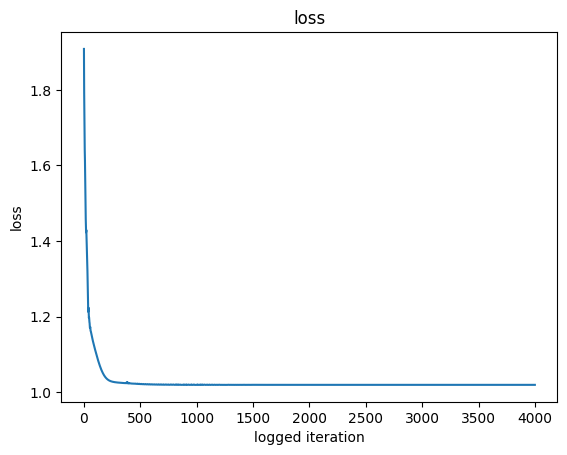

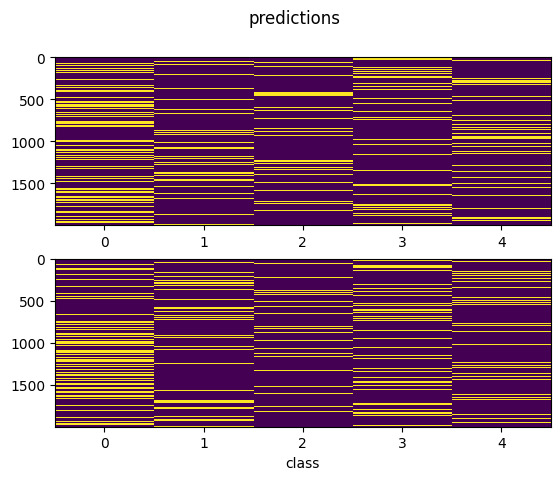

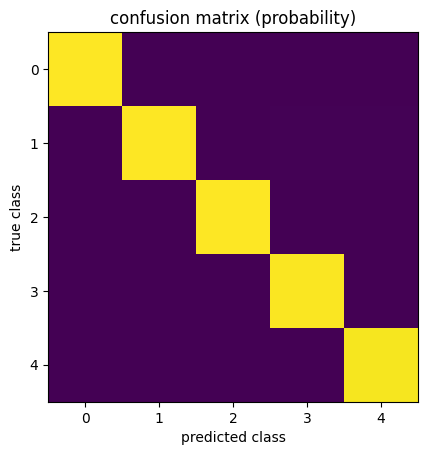

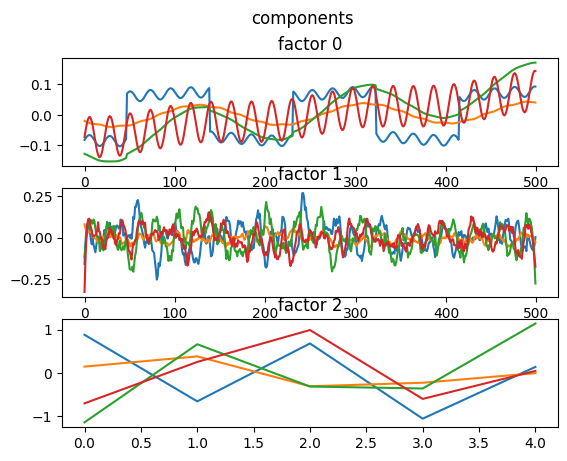

In [16]:
plt.figure()
plt.plot(cpmlr.loss_running);
plt.xlabel('logged iteration')
plt.ylabel('loss')
plt.title('loss')

prob, pred = cpmlr.predict()
fig, axs = plt.subplots(2)
axs[0].imshow(mtr.idx_to_oneHot(pred, cpmlr.n_classes), aspect='auto', interpolation='none')
axs[1].imshow(mtr.idx_to_oneHot(y_trueIdx_fake.numpy(), cpmlr.n_classes), aspect='auto', interpolation='none')
axs[1].set_xlabel('class')
fig.suptitle('predictions')

cm = cpmlr.make_confusion_matrix(prob_or_pred='pred')[0]
fig = plt.figure()
plt.imshow(cm)
plt.ylabel('true class')
plt.xlabel('predicted class')
plt.title('confusion matrix (probability)')

Bcp_final = cpmlr.return_Bcp_final()
fig, axs = plt.subplots(len(Bcp_final))
for ii, val in enumerate(Bcp_final):
    axs[ii].set_title(f'factor {ii}')
    axs[ii].plot(val)
fig.suptitle('components');